In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


In [2]:

raw_dataset = pd.read_csv('boston backfiled (1Y).csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.tail(20)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
146,5/1/2017,213.052477,4.01,78923,4873.019,3.4,464426.027,669.2019,37.00%,241076.0000,1.33%,1662,3.30,248.025
147,6/1/2017,213.679154,3.90,78923,4873.019,3.7,464426.027,669.2019,37.00%,241223.0000,1.30%,1173,3.01,247.032
148,7/1/2017,213.640622,3.97,78923,4873.019,3.7,464426.027,669.2019,36.00%,241480.0000,1.27%,1875,2.95,247.032
149,8/1/2017,214.070085,3.88,78923,4873.019,3.5,464426.027,669.2019,36.00%,241737.0000,1.23%,1032,2.60,250.226
150,9/1/2017,214.679940,3.81,78923,4873.019,3.3,464426.027,669.2019,36.00%,241994.0000,1.20%,1245,2.50,250.226
151,10/1/2017,216.151719,3.90,78923,4873.019,3.0,464426.027,669.2019,36.00%,242478.3333,1.17%,1227,3.15,250.374
152,11/1/2017,216.941665,3.92,78923,4873.019,2.9,464426.027,669.2019,36.00%,242962.6667,1.13%,989,2.47,250.374
153,12/1/2017,216.941067,3.95,78923,4873.019,2.9,464426.027,669.2019,36.00%,243447.0000,1.10%,2129,2.42,252.932
154,2018/1/1,217.192699,4.03,78923,4873.019,3.6,464426.027,622.4511,36.60%,242691.0000,1.10%,1410,2.53,252.932
155,2018/2/1,217.376227,4.33,81498,4873.019,3.5,484620.546,622.4511,36.60%,242691.0000,1.10%,714,2.05,254.992


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,180.049947,5.93,52698,4473.477,4.7,287529.502,1317.6788,226272.0000,1479,0.02,197.4,41.0,0.50
1,4/1/2005,179.342073,5.86,52698,4473.477,4.4,287529.502,1317.6788,227099.6667,1235,0.32,198.6,41.0,0.47
2,5/1/2005,178.325591,5.72,52698,4473.477,4.3,287529.502,1317.6788,227927.3333,1616,0.42,198.6,41.0,0.43
3,6/1/2005,176.495037,5.58,52698,4473.477,4.8,287529.502,1317.6788,228755.0000,1983,0.32,198.8,41.0,0.40
4,7/1/2005,175.601666,5.70,52698,4473.477,4.6,287529.502,1317.6788,229226.6667,1632,1.06,198.8,41.0,0.43


In [4]:
features.isna().sum()

Date                                     0
House_Price_Index(S&P/Case-Shiller)      0
Mortgage_Rate (30 yers)                  0
Personal_Income                          0
Resident_Population                      0
Unemployment_Rate                        0
GDP                                      0
Crime_Rate                               0
Median_Debt                              0
New_Structures                           0
Economic_Conditions_Index                0
CPI all items less shelter               0
Percent_With_Mortgage_Debt               0
Percent_With_Severely_Delinquent_Debt    0
dtype: int64

In [5]:
features=features.drop('Date',axis=1)
train_dataset = features.iloc[:154]
test_dataset = features.iloc[154:]

In [6]:
train_dataset

,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,180.049947,5.93,52698,4473.477,4.7,287529.502,1317.6788,226272.0000,1479,0.02,197.400,41.0,0.50
1,179.342073,5.86,52698,4473.477,4.4,287529.502,1317.6788,227099.6667,1235,0.32,198.600,41.0,0.47
2,178.325591,5.72,52698,4473.477,4.3,287529.502,1317.6788,227927.3333,1616,0.42,198.600,41.0,0.43
3,176.495037,5.58,52698,4473.477,4.8,287529.502,1317.6788,228755.0000,1983,0.32,198.800,41.0,0.40
4,175.601666,5.70,52698,4473.477,4.6,287529.502,1317.6788,229226.6667,1632,1.06,198.800,41.0,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,214.070085,3.88,78923,4873.019,3.5,464426.027,669.2019,241737.0000,1032,2.60,250.226,36.0,1.23
150,214.679940,3.81,78923,4873.019,3.3,464426.027,669.2019,241994.0000,1245,2.50,250.226,36.0,1.20
151,216.151719,3.90,78923,4873.019,3.0,464426.027,669.2019,242478.3333,1227,3.15,250.374,36.0,1.17
152,216.941665,3.92,78923,4873.019,2.9,464426.027,669.2019,242962.6667,989,2.47,250.374,36.0,1.13


In [7]:
train_stats = train_dataset.describe()
train_stats.pop('House_Price_Index(S&P/Case-Shiller)')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),154.0,4.769286,1.037777,3.3500,3.91250,4.43000,5.85000,6.7600
Personal_Income,154.0,63364.331169,7831.639030,52698.0000,56800.00000,62416.00000,69399.00000,78923.0000
Resident_Population,154.0,4668.829039,126.859625,4473.4770,4566.34800,4656.59300,4778.34000,4873.0190
Unemployment_Rate,154.0,5.283766,1.407704,2.9000,4.20000,5.00000,6.40000,8.6000
GDP,154.0,362383.183110,53395.798830,287529.5020,312220.17100,356854.84600,405651.20700,464426.0270
Crime_Rate,154.0,924.491787,221.460031,669.2019,725.68850,845.24410,1104.44770,1339.4548
Median_Debt,154.0,240495.798701,4063.449827,226272.0000,238447.08335,240211.33335,243726.66665,246863.0000
New_Structures,154.0,899.766234,432.260766,237.0000,595.25000,842.00000,1128.00000,2129.0000
Economic_Conditions_Index,154.0,1.348117,1.735384,-5.2100,0.91500,1.62000,2.50000,4.0200
CPI all items less shelter,154.0,229.706351,14.651442,197.4000,217.33200,235.46600,241.68150,252.9320


In [8]:
train_labels = train_dataset.pop('House_Price_Index(S&P/Case-Shiller)')
test_labels = test_dataset.pop('House_Price_Index(S&P/Case-Shiller)')

In [9]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.head(20)

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.118462,-1.361954,-1.539907,-0.414694,-1.401865,1.775431,-3.500424,1.340010,-0.765316,-2.204995,0.671186,-1.568792
1,1.051011,-1.361954,-1.539907,-0.627807,-1.401865,1.775431,-3.296739,0.775536,-0.592443,-2.123091,0.671186,-1.593345
2,0.916107,-1.361954,-1.539907,-0.698845,-1.401865,1.775431,-3.093053,1.656948,-0.534819,-2.123091,0.671186,-1.626081
3,0.781203,-1.361954,-1.539907,-0.343656,-1.401865,1.775431,-2.889367,2.505973,-0.592443,-2.109441,0.671186,-1.650633
4,0.896835,-1.361954,-1.539907,-0.485732,-1.401865,1.775431,-2.773292,1.693963,-0.166025,-2.109441,0.671186,-1.626081
5,1.012467,-1.361954,-1.539907,-0.698845,-1.401865,1.775431,-2.657216,0.745462,-0.240936,-1.536118,0.671186,-1.593345
6,0.964287,-1.361954,-1.539907,-0.414694,-1.401865,1.775431,-2.541141,0.814864,-0.068064,-1.536118,0.671186,-1.568792
7,1.253366,-1.361954,-1.539907,-0.769882,-1.401865,1.775431,-2.229501,0.775536,-0.114163,-1.809129,0.149152,-1.544240
8,1.503902,-1.361954,-1.539907,-0.627807,-1.401865,1.775431,-1.917861,0.773223,-0.235174,-1.809129,0.149152,-1.511504
9,1.446086,-1.361954,-1.539907,-0.769882,-1.401865,1.775431,-1.606221,1.883663,-0.356184,-1.693100,0.149152,-1.486951


In [10]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [11]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [12]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.21905473],
       [-0.2976807 ],
       [-0.22980443],
       [-0.23807314],
       [-0.32375595],
       [-0.2941147 ],
       [-0.3313613 ],
       [-0.3260575 ],
       [-0.33598053],
       [-0.19923708]], dtype=float32)

In [13]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 400

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

KeyError: 'val_mae'

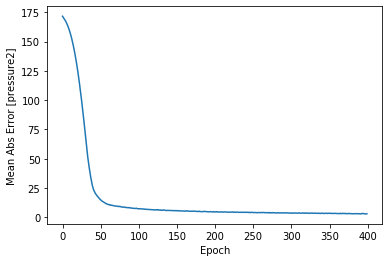

In [14]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [pressure2]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,200])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [pressure2^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,40000])
  plt.legend()
  plt.show()


plot_history(history)

Mean Absolute Error: 4.31
Accuracy: 98.05 %.


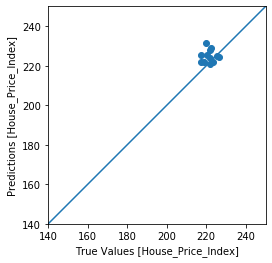

In [15]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 250]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

test_errors = abs(test_predictions - test_labels)


print('Mean Absolute Error:', round(np.mean(test_errors), 2))

mape = np.mean(100 * (test_errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2.99
Accuracy: 98.29 %.


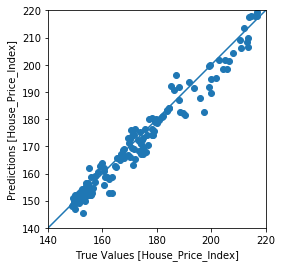

In [16]:
train_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
train_errors = abs(train_predictions - train_labels)


print('Mean Absolute Error:', round(np.mean(train_errors), 2))

mape = np.mean(100 * (train_errors / train_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [17]:
prediction_features=features   #produce prediction result
prediction_features

,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,180.049947,5.93,52698,4473.477,4.7,287529.502,1317.6788,226272.0000,1479,0.02,197.400,41.0,0.50
1,179.342073,5.86,52698,4473.477,4.4,287529.502,1317.6788,227099.6667,1235,0.32,198.600,41.0,0.47
2,178.325591,5.72,52698,4473.477,4.3,287529.502,1317.6788,227927.3333,1616,0.42,198.600,41.0,0.43
3,176.495037,5.58,52698,4473.477,4.8,287529.502,1317.6788,228755.0000,1983,0.32,198.800,41.0,0.40
4,175.601666,5.70,52698,4473.477,4.6,287529.502,1317.6788,229226.6667,1632,1.06,198.800,41.0,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,222.496677,4.55,81498,4873.019,3.0,484620.546,622.4511,242506.0000,622,2.25,256.436,36.2,0.90
162,222.104977,4.63,81498,4873.019,2.9,484620.546,622.4511,242506.0000,721,1.89,256.436,36.2,0.90
163,223.589000,4.83,81498,4873.019,2.6,484620.546,622.4511,244158.0000,1136,1.74,256.108,36.1,0.90
164,225.243878,4.87,81498,4873.019,2.5,484620.546,622.4511,244158.0000,919,2.39,256.108,36.1,0.90


In [18]:
prediction_features.pop('House_Price_Index(S&P/Case-Shiller)')
normed_prediction_features=norm(prediction_features)
prediction_result=model.predict(normed_prediction_features)
prediction_result=pd.DataFrame(prediction_result)
rawdataset=raw_dataset.join(prediction_result)
rawdataset                              

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,0
0,3/1/2005,180.049947,5.93,52698,4473.477,4.7,287529.502,1317.6788,41.00%,226272.0000,0.50%,1479,0.02,197.400,178.701355
1,4/1/2005,179.342073,5.86,52698,4473.477,4.4,287529.502,1317.6788,41.00%,227099.6667,0.47%,1235,0.32,198.600,178.866333
2,5/1/2005,178.325591,5.72,52698,4473.477,4.3,287529.502,1317.6788,41.00%,227927.3333,0.43%,1616,0.42,198.600,176.450439
3,6/1/2005,176.495037,5.58,52698,4473.477,4.8,287529.502,1317.6788,41.00%,228755.0000,0.40%,1983,0.32,198.800,174.171967
4,7/1/2005,175.601666,5.70,52698,4473.477,4.6,287529.502,1317.6788,41.00%,229226.6667,0.43%,1632,1.06,198.800,176.244370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2018/8/1,222.496677,4.55,81498,4873.019,3.0,484620.546,622.4511,36.20%,242506.0000,0.90%,622,2.25,256.436,229.120529
162,2018/9/1,222.104977,4.63,81498,4873.019,2.9,484620.546,622.4511,36.20%,242506.0000,0.90%,721,1.89,256.436,227.867432
163,2018/10/1,223.589000,4.83,81498,4873.019,2.6,484620.546,622.4511,36.10%,244158.0000,0.90%,1136,1.74,256.108,222.115173
164,2018/11/1,225.243878,4.87,81498,4873.019,2.5,484620.546,622.4511,36.10%,244158.0000,0.90%,919,2.39,256.108,224.723236


In [19]:
rawdataset.to_csv('prediction-result.csv',index = False, header=True)